In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
df = pd.read_csv(r"C:\Users\mainakd\Documents\AKshayTask\nlp\machine_learning_self_study_udemy\model\datasets\cars.csv")
df.head()

,mpg,cylinders,cubicinches,hp,weightlbs,time-to-60,year,brand
0,14.0,8,350,165,4209,12,1972,US.
1,31.9,4,89,71,1925,14,1980,Europe.
2,17.0,8,302,140,3449,11,1971,US.
3,15.0,8,400,150,3761,10,1971,US.
4,30.5,4,98,63,2051,17,1978,US.


In [4]:
# Shuffle the data set and ensure that all of the original data is presserved
df = df.sample(frac=1)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 261 entries, 107 to 245
Data columns (total 8 columns):
mpg             261 non-null float64
 cylinders      261 non-null int64
 cubicinches    261 non-null object
 hp             261 non-null int64
 weightlbs      261 non-null object
 time-to-60     261 non-null int64
 year           261 non-null int64
 brand          261 non-null object
dtypes: float64(1), int64(4), object(3)
memory usage: 18.4+ KB


In [6]:
df.columns = df.columns.str.lstrip()
df.columns

Index(['mpg', 'cylinders', 'cubicinches', 'hp', 'weightlbs', 'time-to-60',
       'year', 'brand'],
      dtype='object')

In [7]:
## object value to numeric value
## errors = couerce simple put the invalid values to nan's
df['cubicinches'] = pd.to_numeric(df['cubicinches'], errors = 'coerce')
df['weightlbs'] = pd.to_numeric(df['weightlbs'], errors = 'coerce')

In [8]:
# Drop all the missing value
df.dropna(inplace=True)

In [9]:
df.shape


(256, 8)

In [10]:
## Covert the Brand columns to numeric form using Label Encoder
from sklearn.preprocessing import LabelEncoder

label_encoder= LabelEncoder()
df['brand']= label_encoder.fit_transform(df['brand'].astype(str)) 
df.head()

,mpg,cylinders,cubicinches,hp,weightlbs,time-to-60,year,brand
107,30.0,4,88.0,76,2065.0,15,1972,0
141,29.0,4,97.0,75,2171.0,16,1976,1
159,16.2,6,163.0,133,3410.0,16,1979,0
196,27.2,4,135.0,84,2490.0,16,1982,2
225,32.0,4,83.0,61,2003.0,19,1975,1


In [11]:
data_x = pd.DataFrame(df, columns =['mpg','cubicinches', 'cylinders', 'hp'])

label_y= df['brand']

Text(0, 0.5, 'Weight')

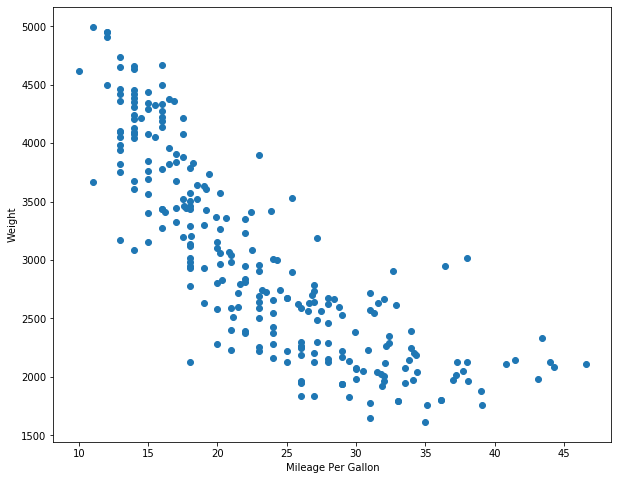

In [12]:
plt.figure(figsize = (10,8))
plt.scatter(df['mpg'], df['weightlbs'])
plt.xlabel('Mileage Per Gallon')
plt.ylabel('Weight')


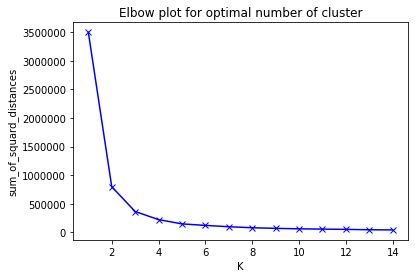

In [13]:
from sklearn.cluster import KMeans

sum_of_squard_distances = []
K = range(1,15)

for k in K:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(data_x)
    
    sum_of_squard_distances.append(kmeans.inertia_)

plt.plot(K, sum_of_squard_distances, 'bx-')
plt.xlabel('K')
plt.ylabel("sum_of_squard_distances")
plt.title('Elbow plot for optimal number of cluster')

plt.show()

In [14]:
kmeans = KMeans(n_clusters=3)
kmeans = kmeans.fit(data_x)


In [15]:
from sklearn.metrics import silhouette_score
score = silhouette_score(df, kmeans.labels_)
print("Scroe: {}".format(score))

Scroe: 0.42092598821537286


In [16]:
# Homogeneity Score: Clustering satisfy homogeneity if all cluster contain only points from the same class
from sklearn.metrics import homogeneity_score

# Homogeneity takes acctual labels from our data points and also labels assigned by kmeans 
hmg_score = homogeneity_score(label_y, kmeans.labels_)
print("Homogeneity score: {}".format(hmg_score))

Homogeneity score: 0.31550036277564175


In [18]:
# Harmonic mean of the homogeneity score and the completeness score- harmonic mean usually used to find the avarage of rates
from sklearn.metrics import v_measure_score

vm_score = v_measure_score(label_y, kmeans.labels_)
print("V Measure Score: {}".format(vm_score))

V Measure Score: 0.3003375614022765


In [19]:
# Completness score : Clustering satisfy completness if all the points that are members of the same class belong to the same cluster

from sklearn.metrics import completeness_score

comp_score = completeness_score(label_y, kmeans.labels_)

print("Completeness Score: {}".format(comp_score))

Completeness Score: 0.28656536273532296


In [21]:
## Adjusted Random Score: when cluster have been randomly generated on your data this score closed to zero, if it is 1 it will best possible clustering

from sklearn.metrics import adjusted_rand_score

adj_r_score = adjusted_rand_score(label_y, kmeans.labels_)

print("Adjusted Random Score: {}".format(adj_r_score))


Adjusted Random Score: 0.11281925794858025


In [23]:
# Adjusted  Mutual information score: is the information from one random variable by observing another variable, adjusted to account for chance
from sklearn.metrics import adjusted_mutual_info_score

adj_mutual = adjusted_mutual_info_score(label_y, kmeans.labels_, average_method = "arithmetic")
print("Adjusted Mutual Information Score: {}".format(adj_mutual))

Adjusted Mutual Information Score: 0.29459818425329665
